In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('cardioActivities.csv', parse_dates=True, index_col='Date')

display(df.head(5))
df.info()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [85]:
# remove columns not useful for analyst
cols_to_drop = ['Friend\'s Tagged','Notes','GPX File','Activity Id','Route Name','Calories Burned']

df.drop(columns=cols_to_drop, inplace=True)

In [86]:
# replace the 'Orther' activity type to 'Unicycling' 

display(df['Type'].value_counts())
df['Type'] = df['Type'].str.replace('Other','Unicycling')
df.isnull().sum()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

In [87]:
avg_hr_run = df[df.Type == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cyc = df[df.Type == 'Cycling']['Average Heart Rate (bpm)'].mean()

df_run = df[df.Type == 'Running'].copy()
df_cyc = df[df.Type == 'Cycling'].copy()
df_walk = df[df.Type == 'Walking'].copy()

df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cyc['Average Heart Rate (bpm)'].fillna(int(avg_hr_cyc), inplace=True)

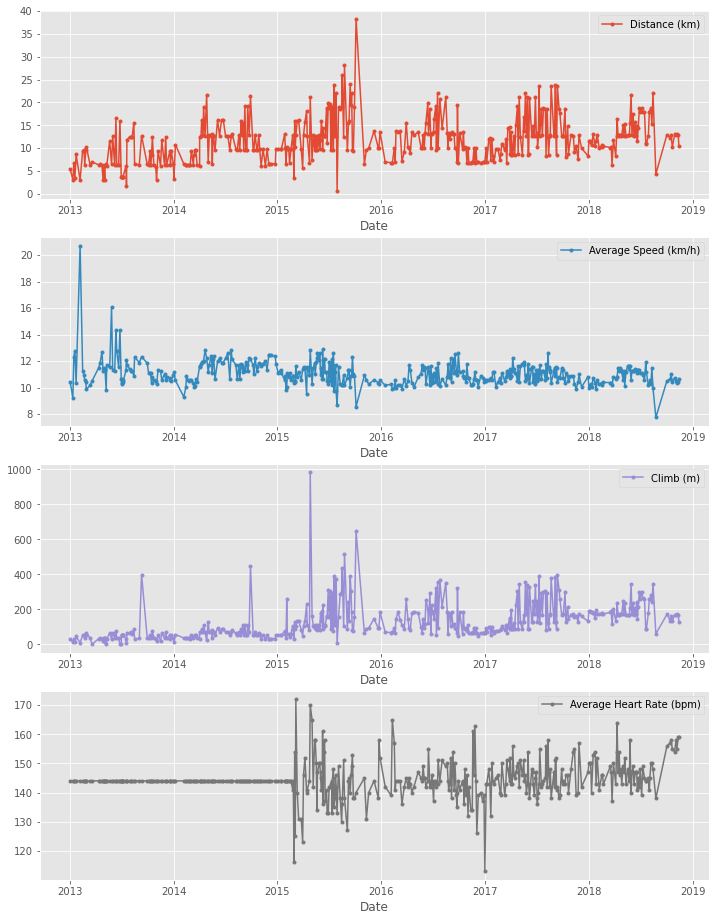

In [6]:
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.'))
    
runs_subset_2013_2018 = df_run.loc['2013-01-02 18:35:11':'2018-11-11 14:05:12']
runs_subset_2013_2018.plot(subplots=True, sharex=False, figsize=(12,16), 
                           linestyle=None, marker='o', markersize=3)
plt.show()

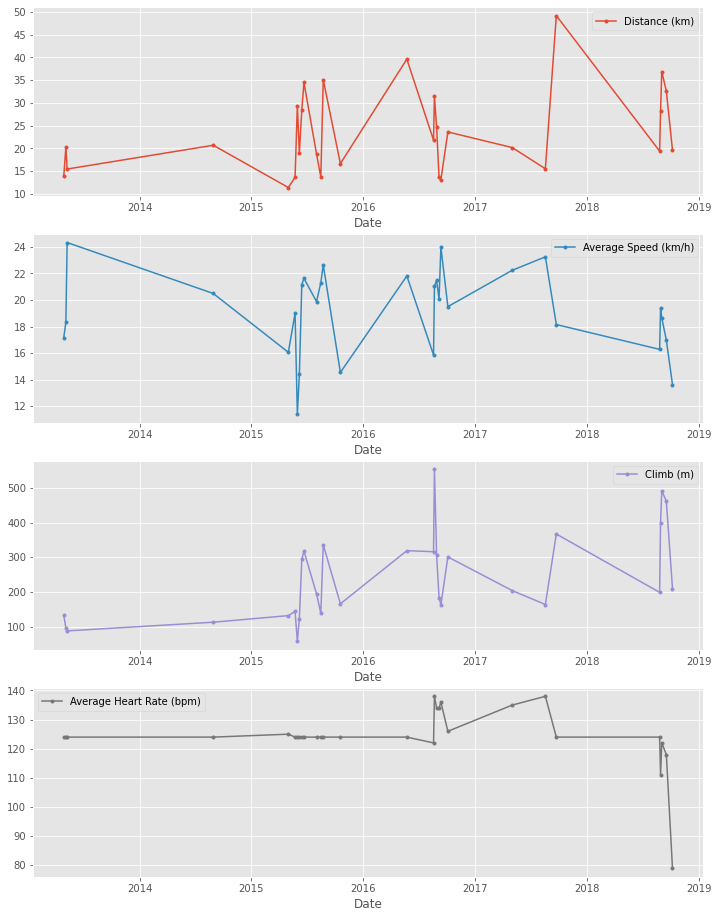

In [9]:
plt.style.use('ggplot')

cyc_subset_2013_2018 = df_cyc.loc['2013-04-28 17:26:52':'2018-10-06 16:45:02']
cyc_subset_2013_2018.plot(subplots=True, figsize=(12,16), sharex=False,
                          linestyle=None, marker='o', markersize=3)
plt.show()

In [55]:
run_subset_2015_2018 = df_run.loc['2015-03-01 5:20:00':'2018-11-11 14:05:12']

print('How my average run looks in last 4 years:')
display(run_subset_2015_2018.resample('A').mean())

print('Weekly averages of last 4 years:')
display(run_subset_2015_2018.resample('W').mean().mean())

weekly_count_avg = run_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average: ', weekly_count_avg)

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,14.464706,11.048971,177.955882,143.676471
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


Distance (km)                12.648992
Average Speed (km/h)         10.837099
Climb (m)                   162.046296
Average Heart Rate (bpm)    144.900206
dtype: float64

How many trainings per week I had on average:  1.4974093264248705


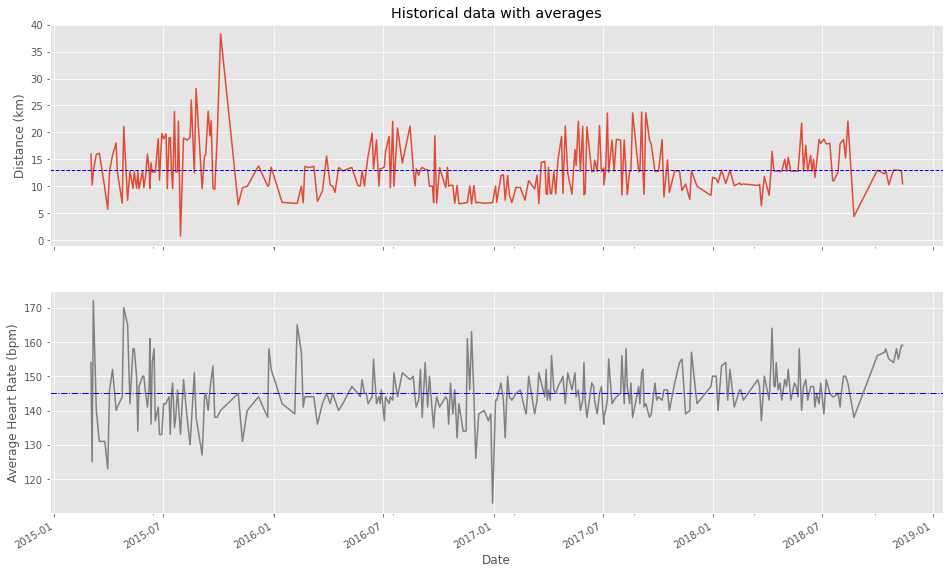

In [63]:
run_distance = run_subset_2015_2018['Distance (km)']
run_hr = run_subset_2015_2018['Average Heart Rate (bpm)']

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,10), sharex=True)

run_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(run_distance.mean(), color='blue', linewidth=1, linestyle='--')

run_hr.plot(ax=ax2, color='gray')
ax2.set(ylabel='Average Heart Rate (bpm)', xlabel='Date')
ax2.axhline(run_hr.mean(), color='blue', linewidth=1, linestyle='-.')

plt.show()

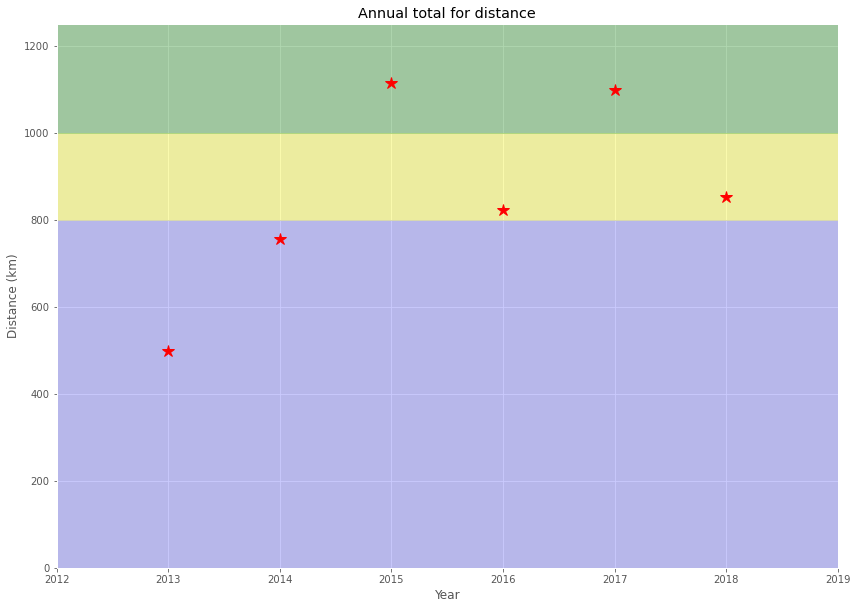

In [73]:
run_distnce_annual = df_run.loc['2013-01-02 18:35:11':'2018-11-11 14:05:12']['Distance (km)'].resample('A').sum()

fig = plt.figure(figsize=(14,10))

ax = run_distnce_annual.plot(marker='*', markersize=12, linewidth=0, color='red')
ax.set(ylim=[0,1250], xlim=['2012','2019'], xlabel='Year', ylabel='Distance (km)',
       title='Annual total for distance')

ax.axhspan(0,800, color='blue', alpha=0.2)
ax.axhspan(800,1000, color='yellow', alpha=0.3)
ax.axhspan(1000,1250, color='green', alpha=0.3)

plt.show()

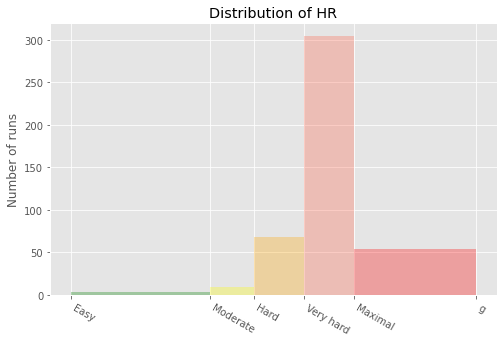

In [78]:
hr_zones = [100,125,133,142,151,173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal','g']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']

run_subset_2015_2018 = df_run.loc['2013-01-02 18:35:11':'2018-11-11 14:05:12']['Average Heart Rate (bpm)']

fig, ax = plt.subplots(figsize=(8,5))

n, bins, patches = ax.hist(run_subset_2015_2018, bins=hr_zones, alpha=0.3)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

plt.show()

In [98]:
df_run_walk_cycle = df_run.append(df_walk).append(df_cyc).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()
print('Total for different training type:')
display(df_totals)

df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

for i in dist_climb_cols:
    df_summary[i, 'totals'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()

Total for different training type:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                             
Cycling 25%                16.980000    139.000000      15.530000
        50%                19.500000    199.000000      20.300000
        75%                21.490000    318.000000      29.400000
        count              29.000000     29.000000      29.000000
        max                24.330000    553.000000      49.180000
        mean               19.125172    240.551724      23.468276
        min                11.380000     58.000000      11.410000
        std                 3.257100    128.960289       9.451040
        totals                   NaN   6976.000000     680.580000
Running 25%                10.495000     54.000000       7.415000
        50%                10.980000     91.000000      10.810000
        75%                11.520000    171.000000      13.190000
        count             459.000000    459.000000     459.000000
        max                20.720000    982.000000      38.320000
        mean               11.056296    124.788671      11.382353
        min                 5.770000      0.000000       0.760000
        std                 0.953273    103.382177       4.937853
        totals                   NaN  57278.000000    5224.500000
Walking 25%                 5.555000      7.000000       1.385000
        50%                 5.970000     10.000000       1.485000
        75%                 6.512500     15.500000       1.787500
        count              18.000000     18.000000      18.000000
        max                 6.910000    112.000000       4.290000
        mean                5.549444     19.388889       1.858333
        min                 1.040000      5.000000       1.220000
        std                 1.459309     27.110100       0.880055
        totals                   NaN    349.000000      33.450000